# check data: ATP finals in the past 10 yrs
- processed data: finals extracted from ATP tournaments in the past 10 yrs (2008-2017), yr 2018 is not included because dataset is not complete
- explore data, and select parameters for prediction

<br>Lin Zhou, Sept 2018

In [2]:
#### imports ####
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
from sklearn import linear_model


# configurations
%matplotlib inline  
#save_path = 'analysis_results/'  # folder for saving analysis results 

In [12]:
#### Main ####

# import csv 
file_path = '../data/processed/finals_yr08-17.csv'
df_finals = pd.read_csv(file_path)  

# create save path for figures 
save_path = '../reports/figures/ATP_finals_2008-2017/'

## Explore ages of players


17.146165904 1.41604910171e-25
ages in finals are significantly different from each year


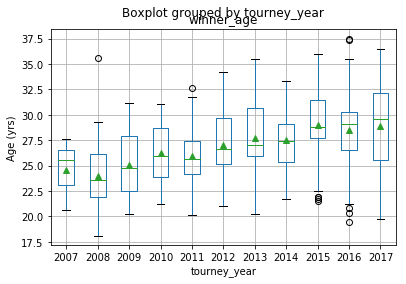

In [4]:
# plot distribution of winner age
final_age_plt = df_finals.boxplot(column = ['winner_age'], by = 'tourney_year', showmeans = True)
plt.ylabel('Age (yrs)')

# one way ANOVA test on ages of players in finals, 
# p_value < 0.05: ages are significantly different; p_value > 0.05: ages are not significantly different
f_value, p_value = stats.f_oneway(df_finals['winner_age'][df_finals['tourney_year'] == 2008],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2009],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2010],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2011],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2012],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2013],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2014],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2015],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2016],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2017])

print(f_value, p_value)
if p_value <= 0.05:
    print('ages in finals are significantly different from each year')
else:
    print('ages in finals are not significantly different from each year')


so there seems to be an upward trend for ages of winners in tournaments, which is consistent with the fact that in recent years, top players remain amost always the same ones 
<br>let's confirm with linear regression?

In [5]:
# linear regression to see if there's a linear increase of player age over the years
X = df_finals['tourney_year'].values
y = df_finals['winner_age'].values

lm = linear_model.LinearRegression()
model = lm.fit(X.reshape(-1, 1) ,y)

# see how good the model is performing: 
print('coefficient of determination R^2 of the prediction = '+ str(model.score(X.reshape(-1, 1) ,y)))

coefficient of determination R^2 of the prediction = 0.176041609826


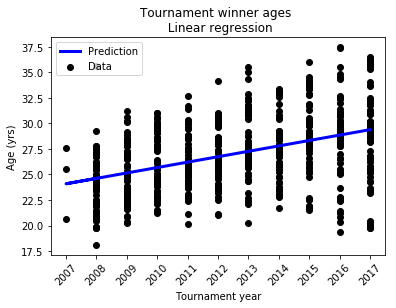

In [13]:
# plot the trend of age increase
plt.scatter(X, y,  color='black')
plt.plot(X.reshape(-1, 1), model.predict(X.reshape(-1, 1)), color='blue', linewidth=3)
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.legend(['Prediction', 'Data'])
plt.title('Tournament winner ages \n Linear regression')
plt.ylabel('Age (yrs)')
plt.xlabel('Tournament year')
plt.xticks(rotation=45)

# save figure
plt.savefig(save_path + 'winner_age_year.png', bbox_inches='tight', dpi=150)

the model has a low score 0.176 (the best model would have 1.0), from the figure we can see there's a upward trend, but data points are very dispersed

## Explore players who are winning the most 
1. Find ways to describe "most-winning": number of tournaments per player over the years? By tourney levels?
2. Is number of wins per player consistent at different tournament levels?

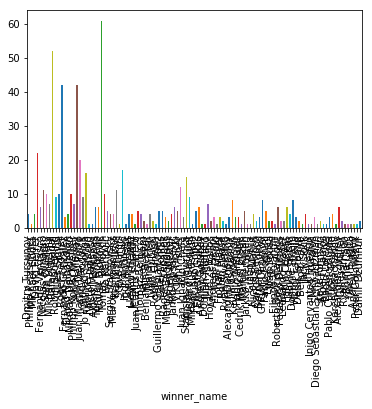

In [47]:
# plot player wins by trourney levels

index = df_finals.winner_name.unique()  # list player names 
GS_count = df_finals.groupby('winner_name', sort=False)['tourney_level'].size()
fig = GS_count.plot.bar()

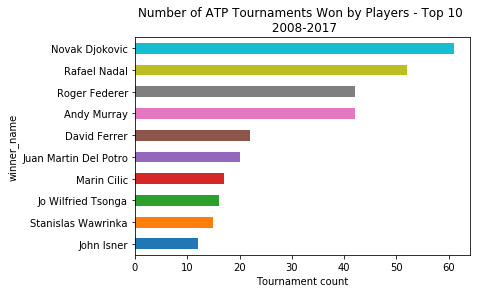

In [14]:
# there are too many players, select first 10，sorted by number of tournament they won
win_count = df_finals.groupby('winner_name', sort=False)['winner_name'].size().sort_values(ascending=False).head(10)
fig = win_count.sort_values().plot.barh()
plt.title('Number of ATP Tournaments Won by Players - Top 10 \n 2008-2017')
plt.xlabel('Tournament count')

# save figure
plt.savefig(save_path + 'winner_tournament_count.png', bbox_inches='tight', dpi=150)

### Pivot Table: winners by tourney levels
group win counts by player names and tournament type. plot bars for each player with tournament types
* see if there's a correlation between number of grand-slam wins, and number of regular tournament wins

In [168]:
# make a pivot table for top 10 players who won the most grand slams, sorted by tournament levels 
df_top_grand_slam = []
df_by_level = df_finals[['winner_name', 'tourney_level']]
sum_by_level = df_by_level.pivot_table(index='winner_name',columns='tourney_level',aggfunc=len, fill_value=0)
sum_by_level.head(10)


# make a pivot table for top 10 players who won the most regular tournaments, sorted by tournament levels 

tourney_level,A,C,F,G,M
winner_name,,,,,
Albert Montanes,6,0,0,0,0
Albert Ramos,1,0,0,0,0
Alexander Zverev,4,0,0,0,2
Alexandr Dolgopolov,3,0,0,0,0
Andreas Seppi,3,0,0,0,0
Andrey Golubev,1,0,0,0,0
Andrey Rublev,1,0,0,0,0
Andy Murray,25,0,0,3,14
Andy Roddick,8,0,0,0,1
